In [1]:
# Import libraries
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import gudhi
from tqdm import tqdm
from persim import PersistenceImager
import invr
import matplotlib as mpl
from PIL import Image
import io

In [2]:
svi_path = "/home/h6x/git_projects/ornl-svi-data-processing/raw_data/svi/2018/SVI2018_US_tract.gdb"

In [3]:
us_svi =  gpd.read_file(svi_path)

In [4]:
# get the unique states
states = us_svi['ST_ABBR'].unique().tolist()

# drop 'DC'
states.remove('DC')

In [5]:
# import numpy as np
# import os
# import matplotlib.pyplot as plt
# from persim import PersistenceImager  # Assuming you're using persim for PersistenceImager

# path = "/home/h6x/git_projects/ornl-svi-data-processing/processed_data/adjacency_pers_images_npy_county/persistence_data"
# var = "EP_MOBILE"

# # Assuming 'states' and 'us_svi' are defined earlier
# for state in states:
#     print(state)

#     state_svi = us_svi[us_svi['ST_ABBR'] == state]

#     # Get the unique counties
#     counties = state_svi['STCNTY'].unique().tolist()
#     print(f"Number of counties: {len(counties)}")

#     combined_data_state = []

#     for county in counties:
#         try:
#             # Try loading the dictionary from the .npy file
#             dictionary = np.load(os.path.join(path, f'{county}_{var}.npy'), allow_pickle=True)

#             # If data is a 0-d array, extract the object using .item()
#             if dictionary.shape == ():  # This means it's a 0-d array
#                 dictionary = dictionary.item()  # Extract the dictionary or object

#             # Iterate over the dictionary
#             for key in dictionary:
#                 for value in dictionary[key]:
#                     combined_data_state.append(value)
        
#         except FileNotFoundError:
#             print(f"File not found for county {county}. Skipping.")
#         except Exception as e:
#             print(f"Error loading data for county {county}: {str(e)}")
    
#     # Plot for a state if data is available
#     if combined_data_state:
#         print(f"Total combined data points for {state}: {len(combined_data_state)}")

#         pimgr = PersistenceImager(pixel_size=0.01)

#         # Plotting the persistence diagram
#         fig, ax = plt.subplots(figsize=(10, 10))

#         # Remove tick labels
#         ax.set_xticks([])
#         ax.set_yticks([])

#         pimgr.plot_diagram(combined_data_state, skew=False, ax=ax)

#         # Remove axis labels
#         ax.set_xlabel('')
#         ax.set_ylabel('')

#         plt.tight_layout()
#         plt.show()
#     else:
#         print(f"No data available for {state} to plot.")

#     # Optionally, you can remove the break if you want to process all states
#     # break


AL
Number of counties: 67


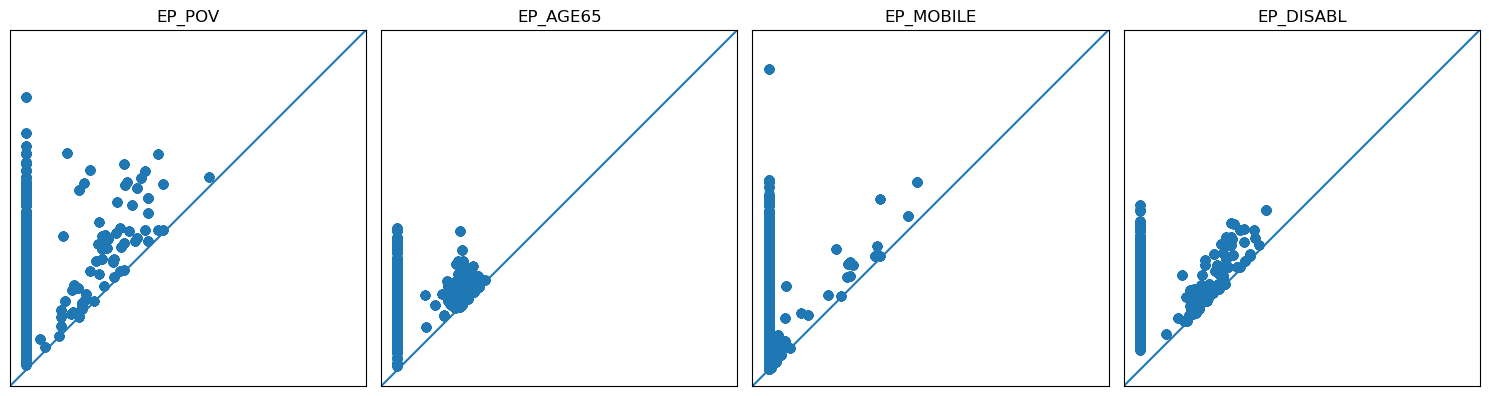

AK
Number of counties: 29


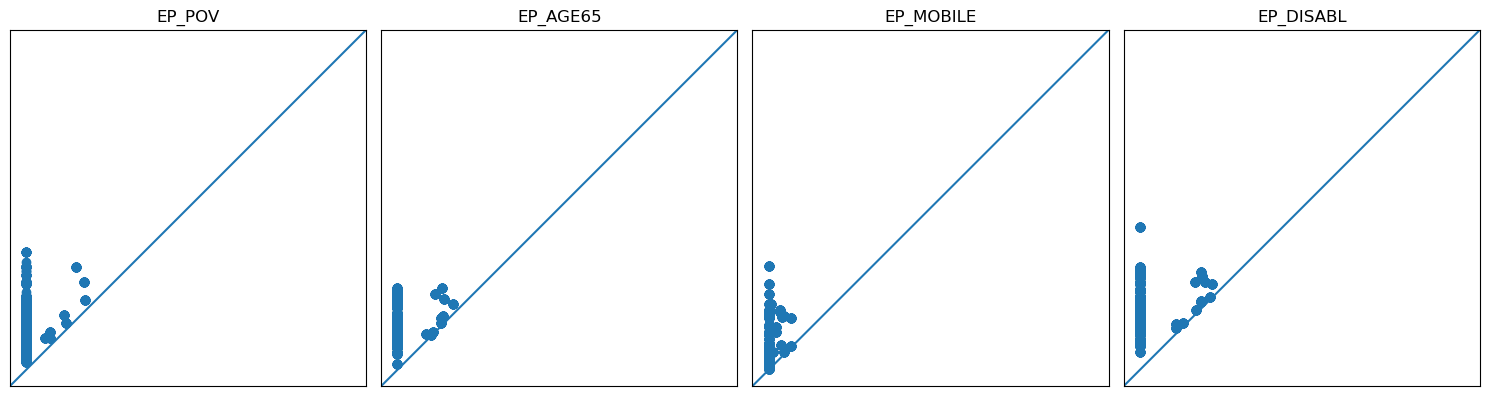

AZ
Number of counties: 15


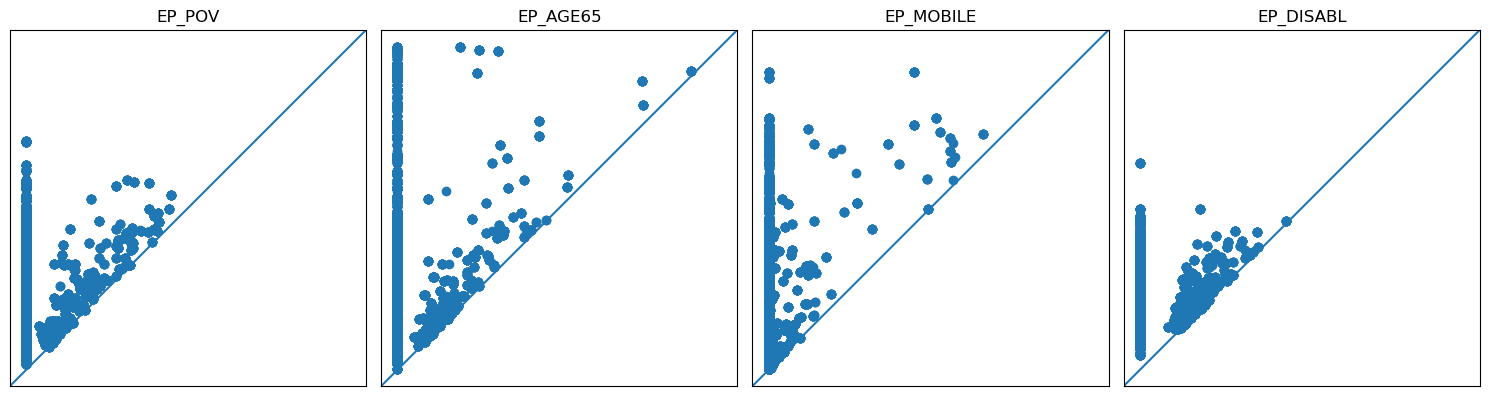

AR
Number of counties: 75


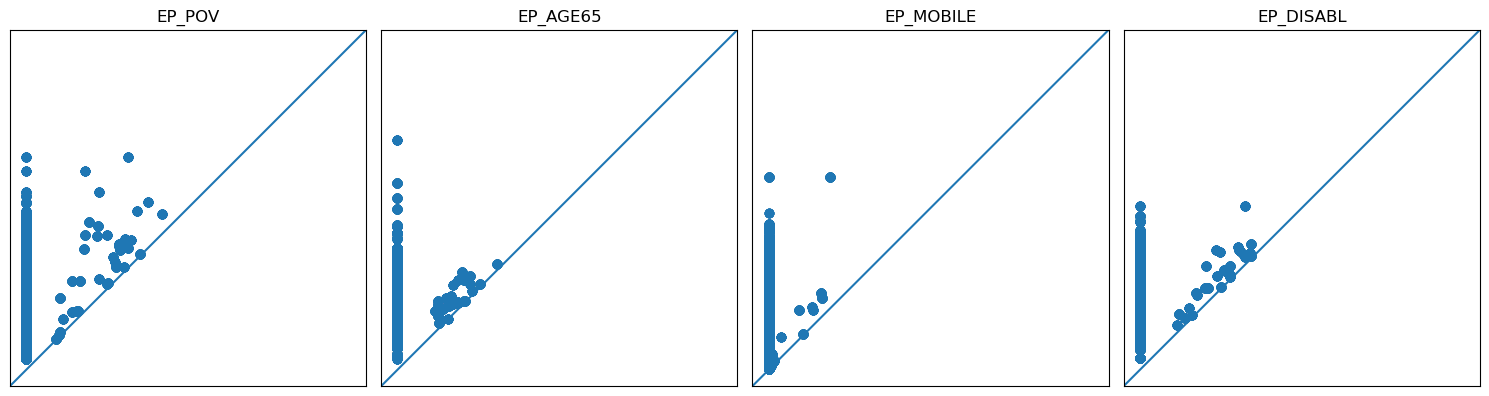

CA
Number of counties: 58


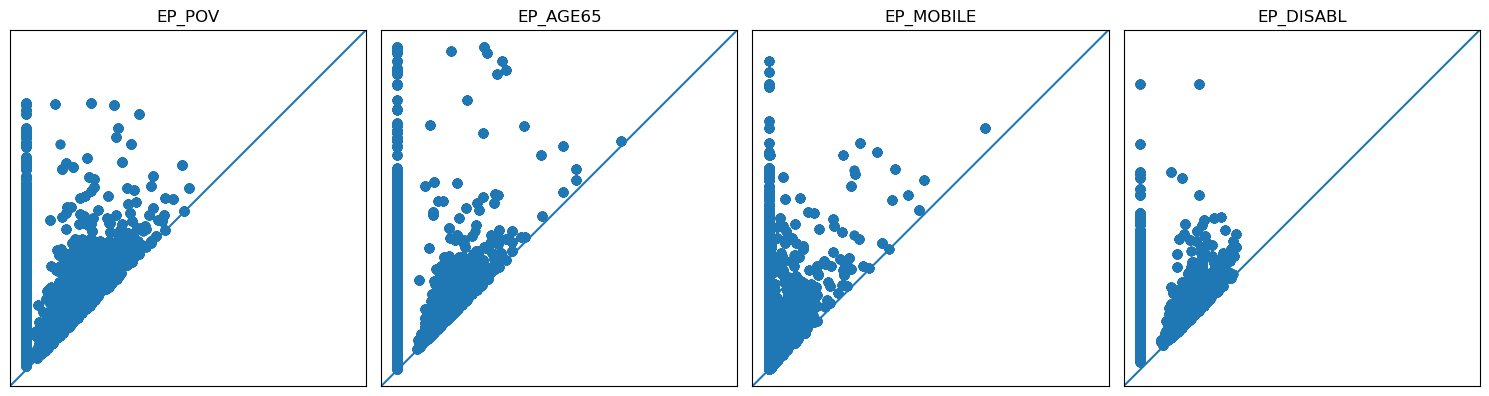

CO
Number of counties: 64


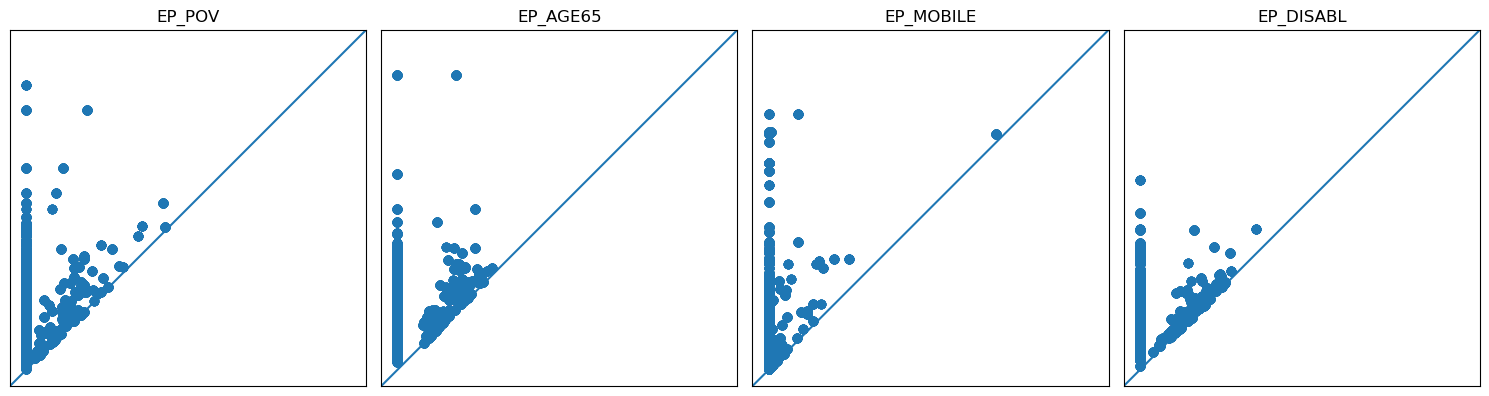

CT
Number of counties: 8


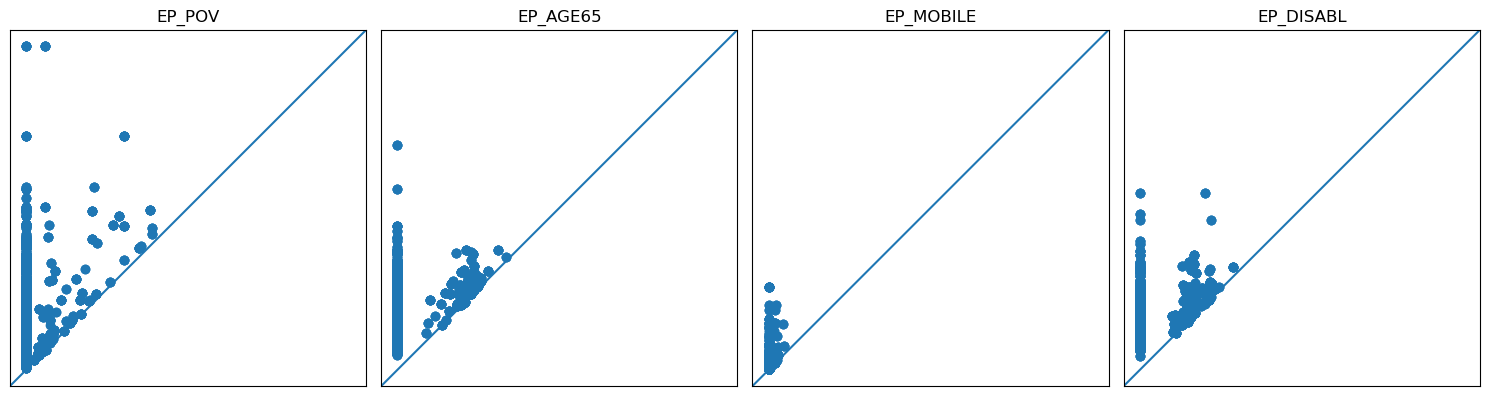

DE
Number of counties: 3


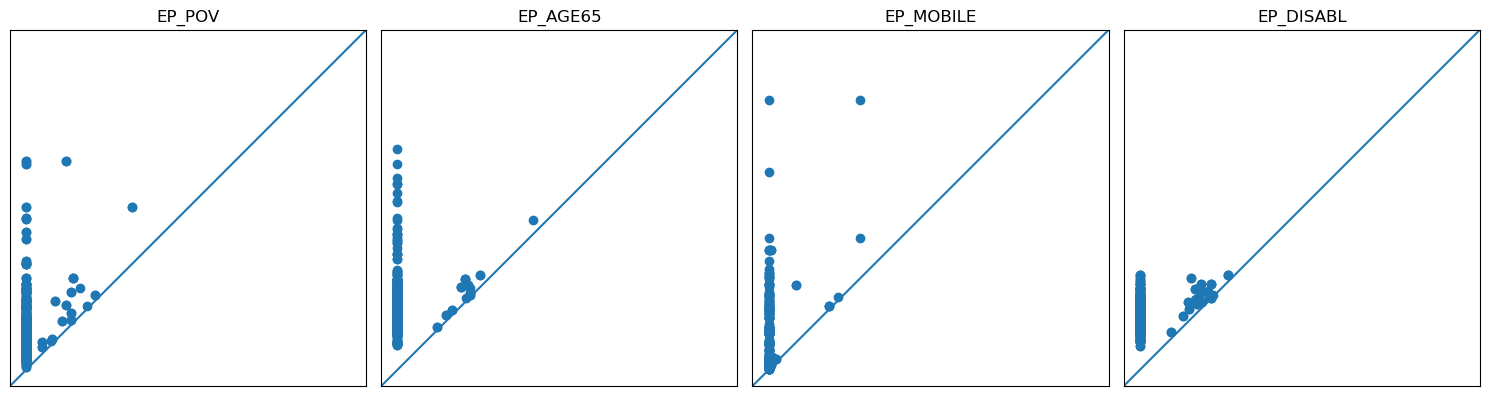

FL
Number of counties: 67


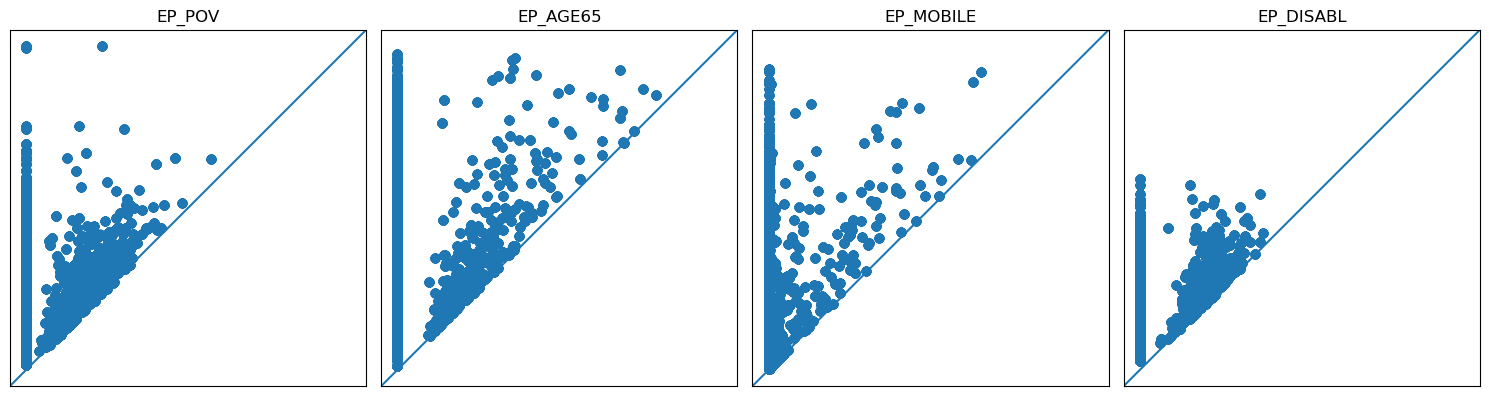

GA
Number of counties: 159


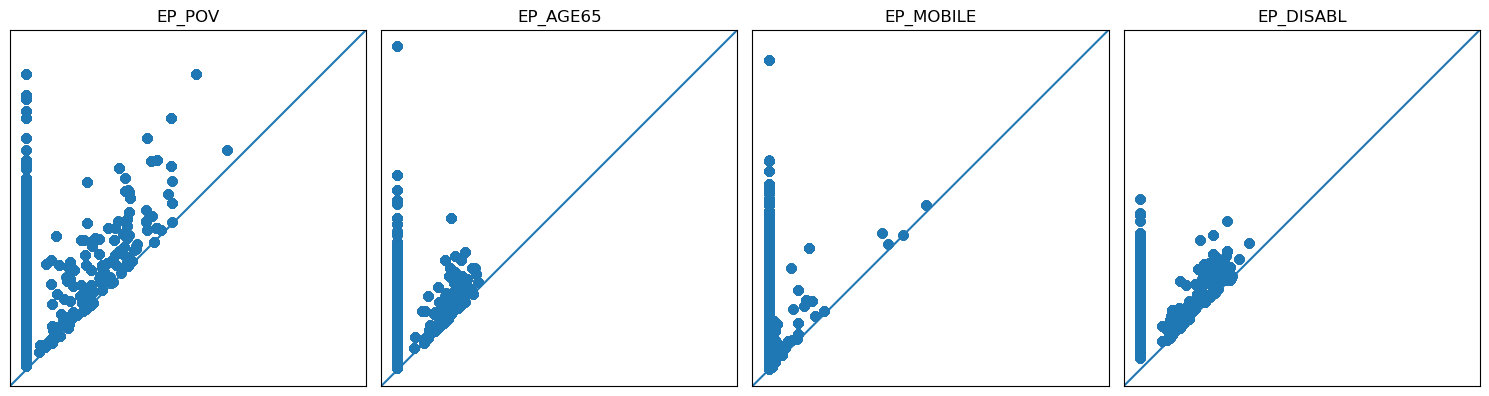

HI
Number of counties: 5


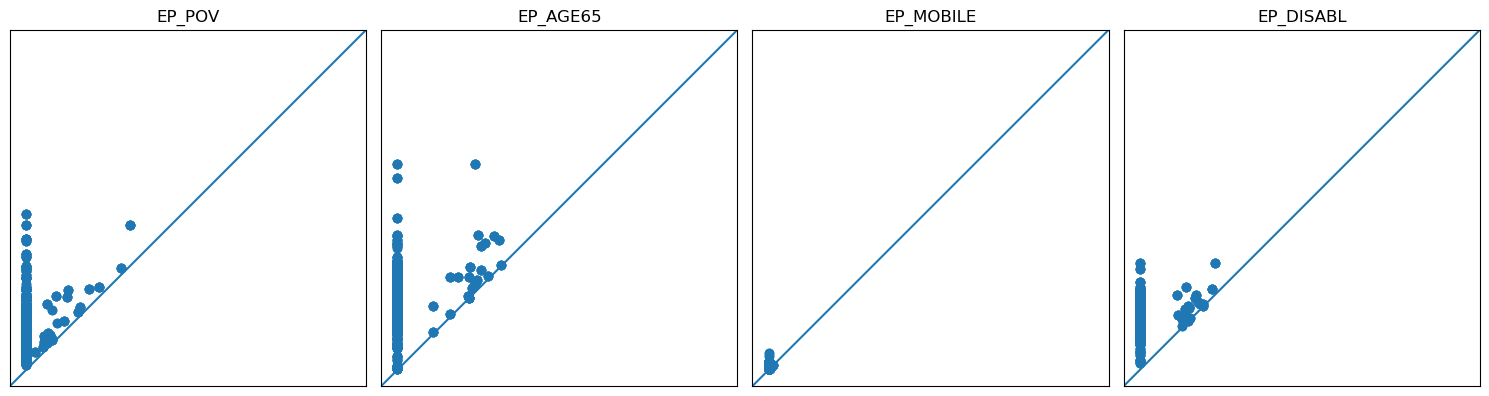

IL
Number of counties: 102


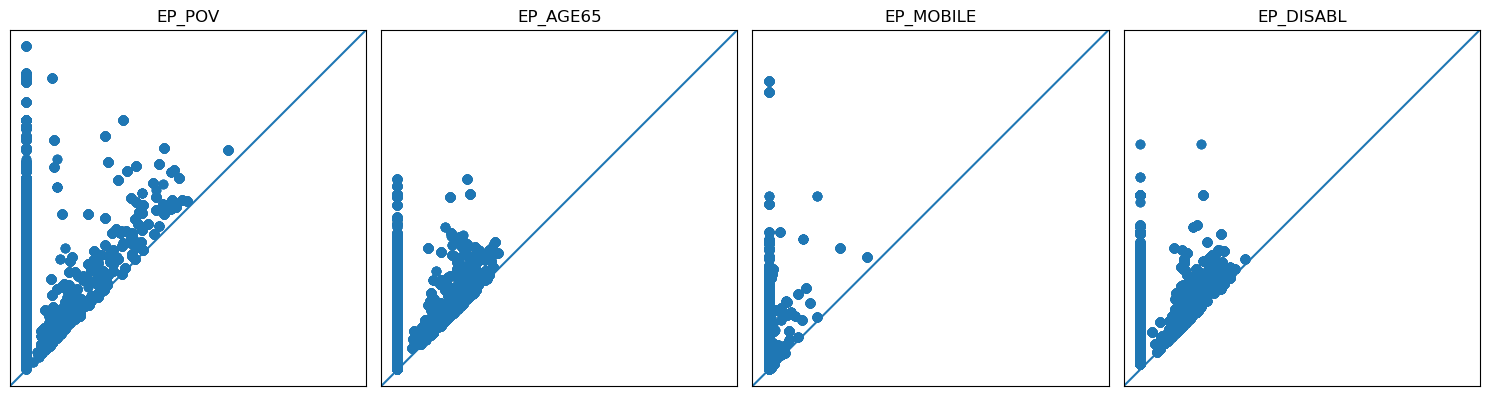

IN
Number of counties: 92


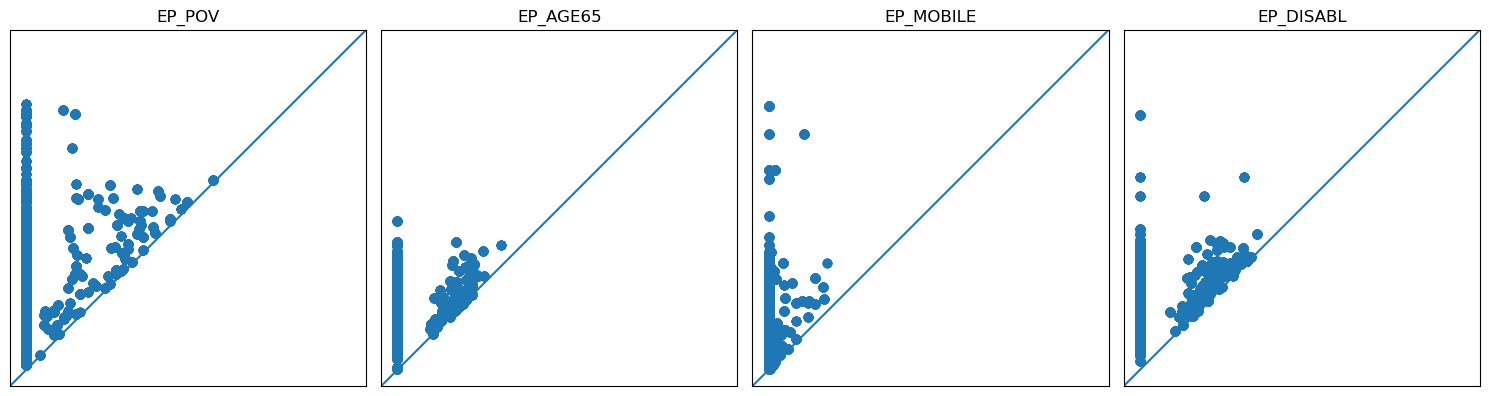

IA
Number of counties: 99


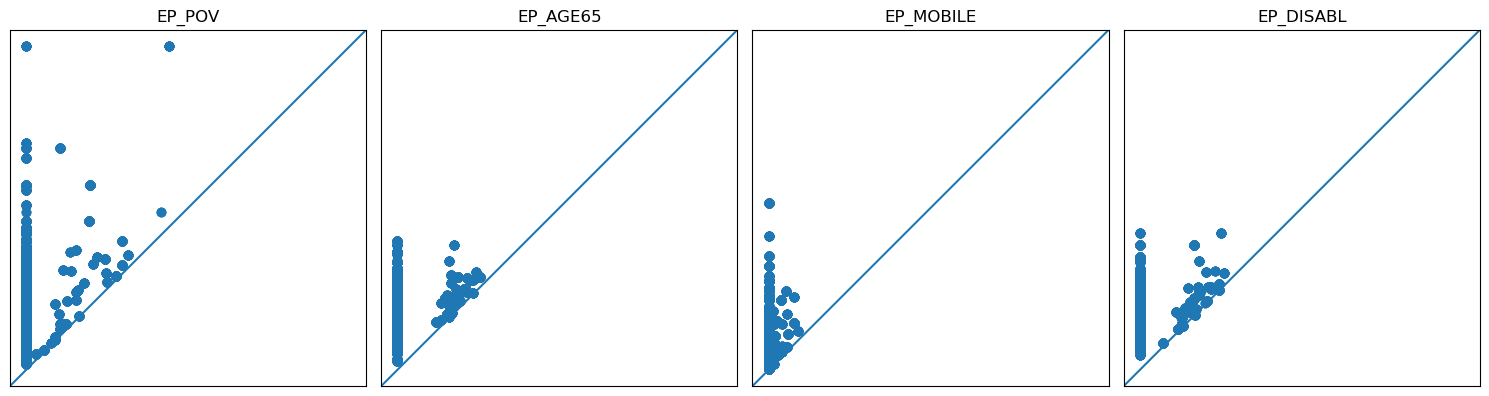

KS
Number of counties: 105


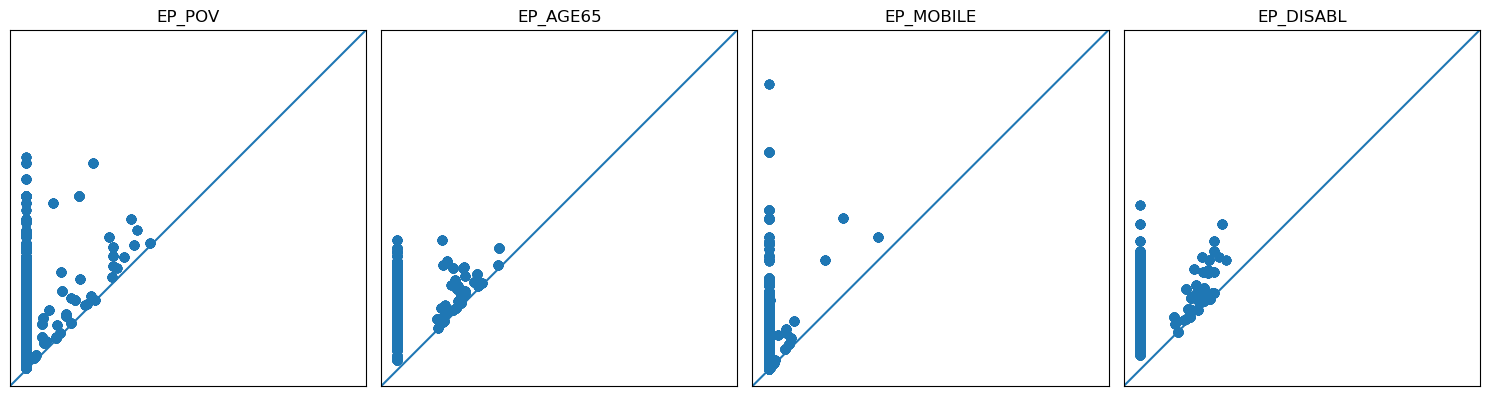

KY
Number of counties: 120


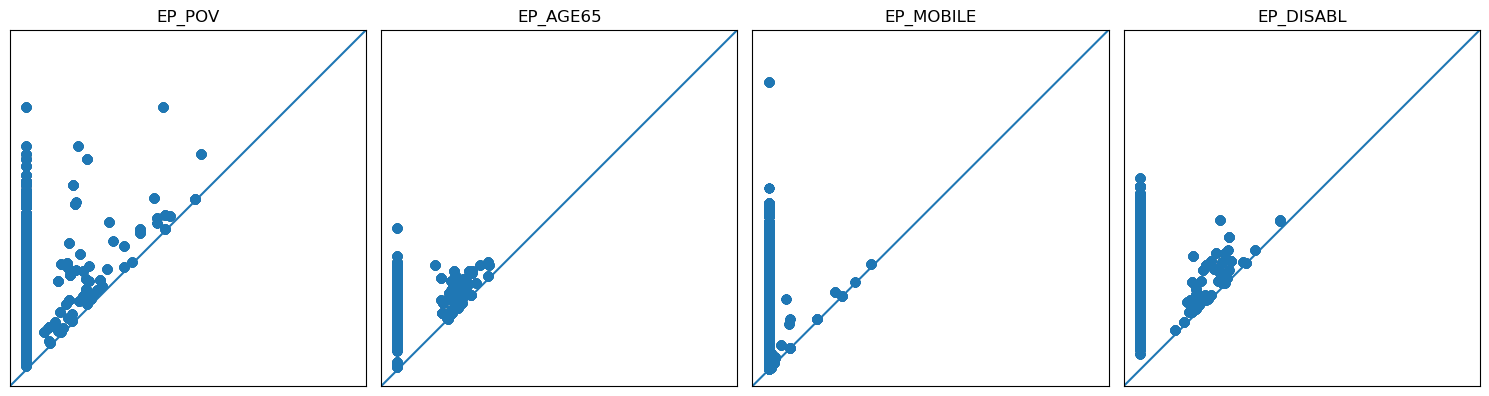

LA
Number of counties: 64


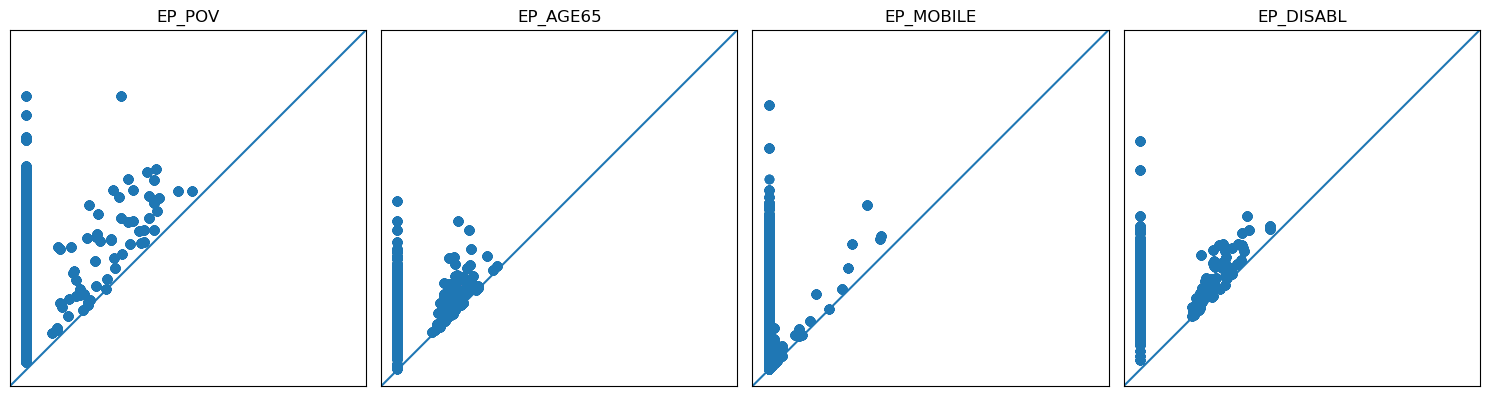

ME
Number of counties: 16


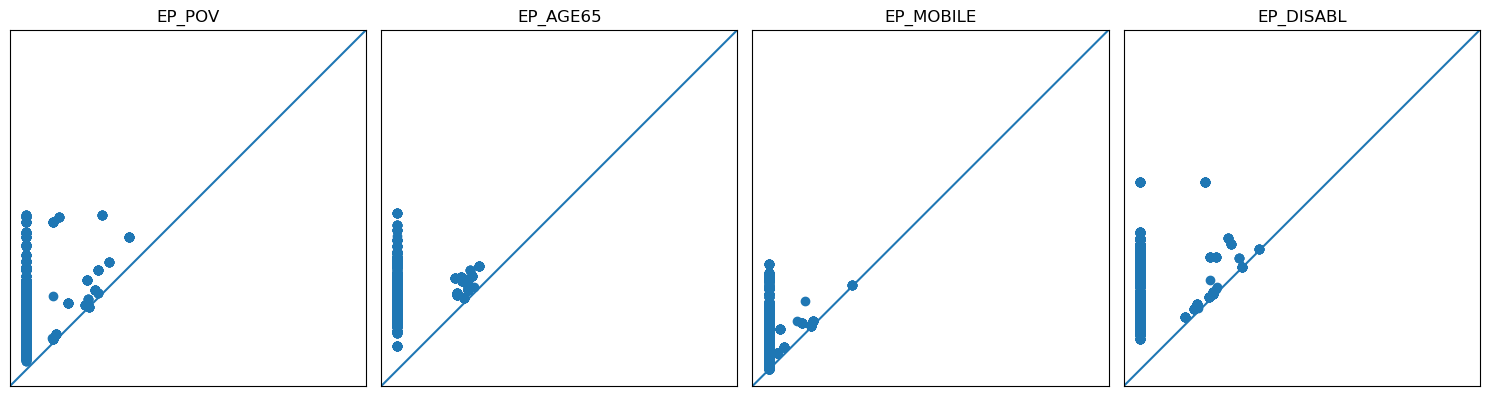

MD
Number of counties: 24


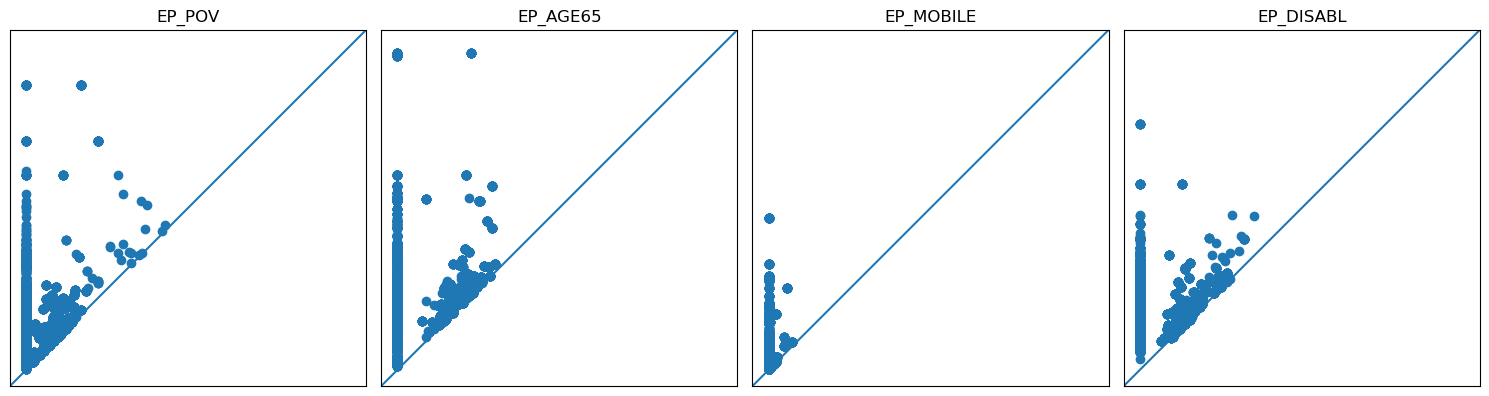

MA
Number of counties: 14


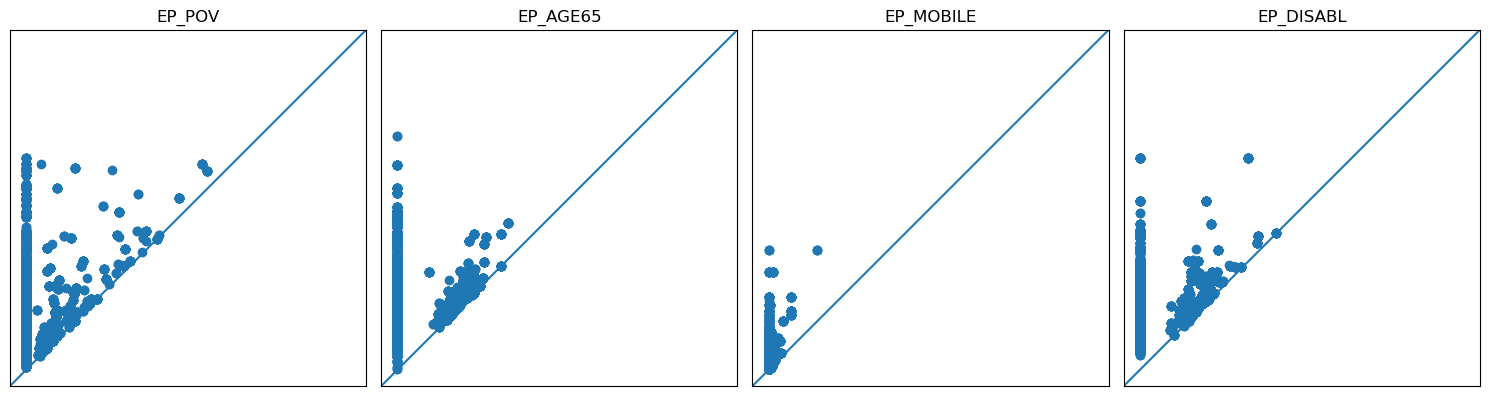

MI
Number of counties: 83


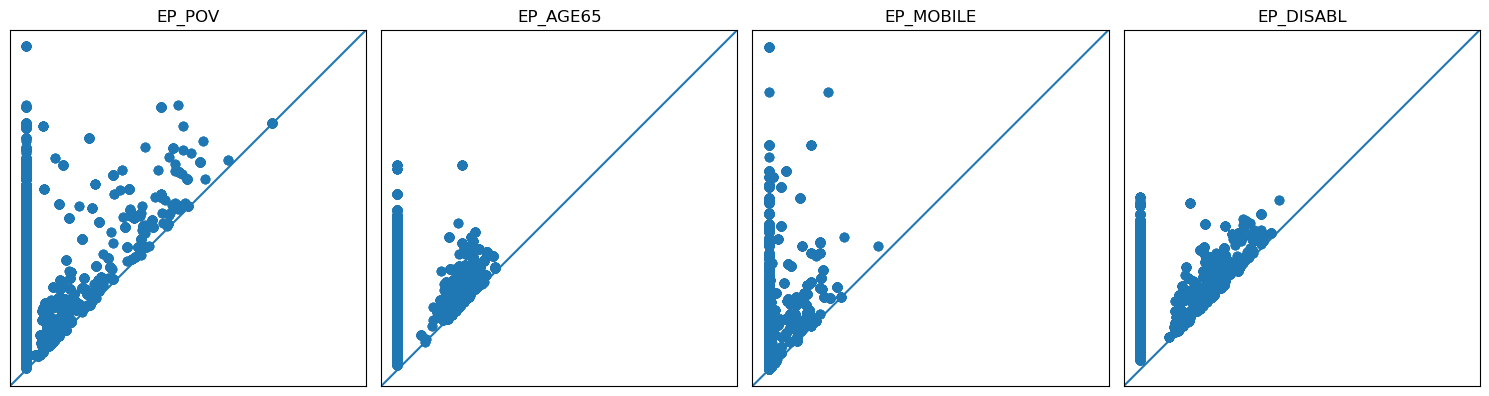

MN
Number of counties: 87


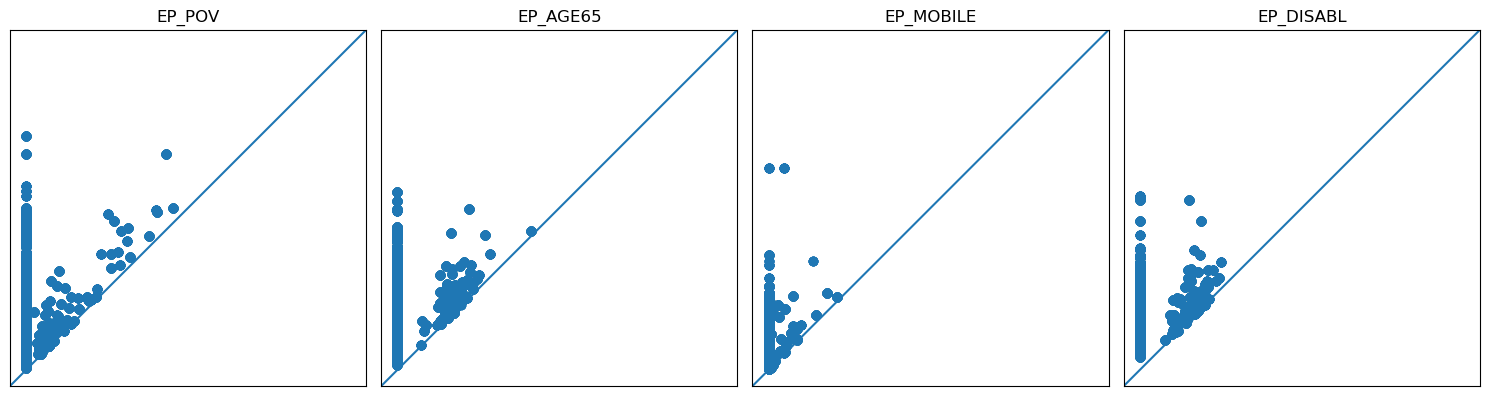

MS
Number of counties: 82


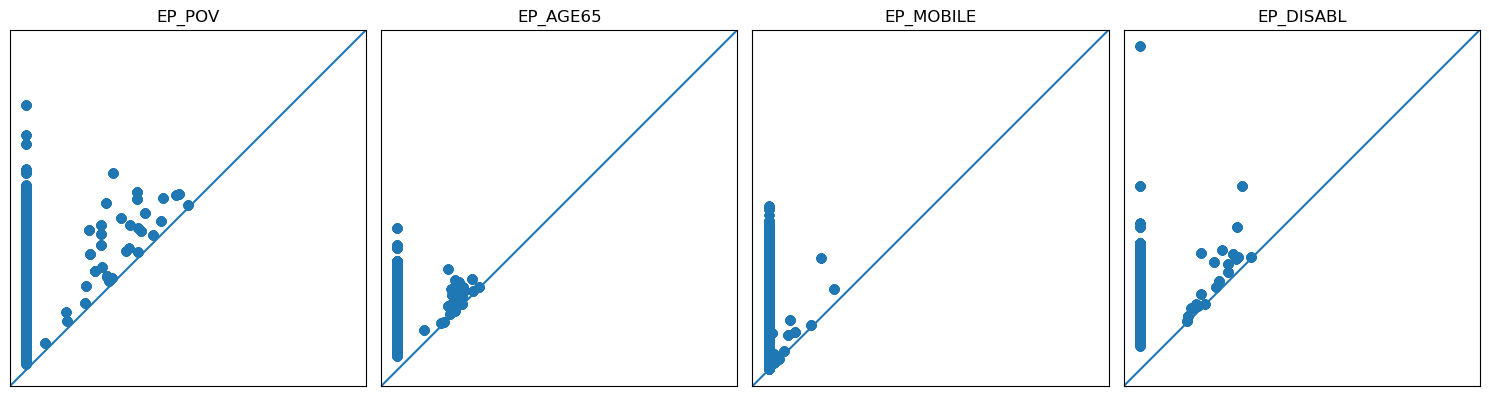

MO
Number of counties: 115


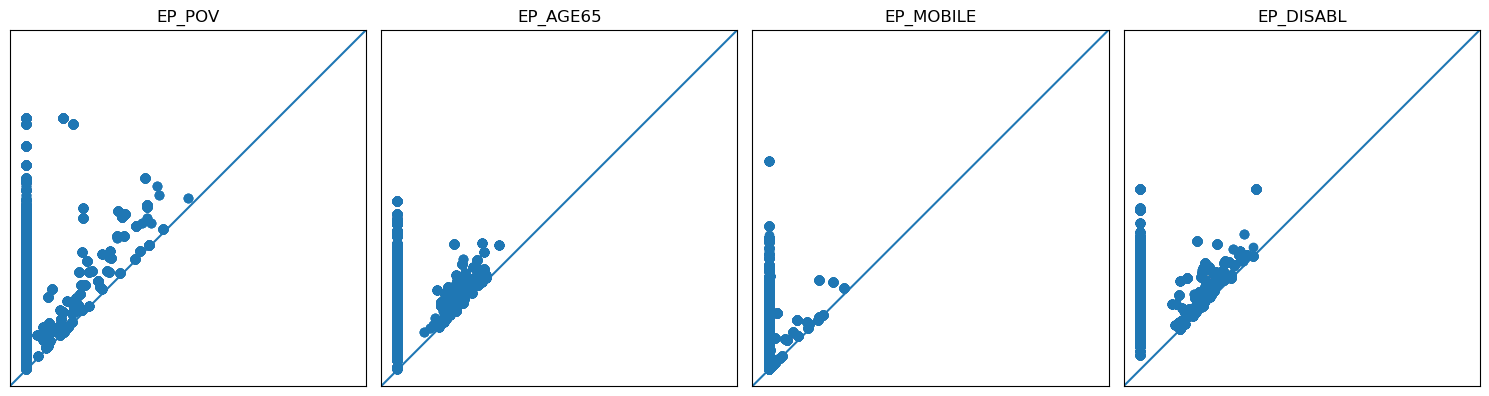

MT
Number of counties: 56


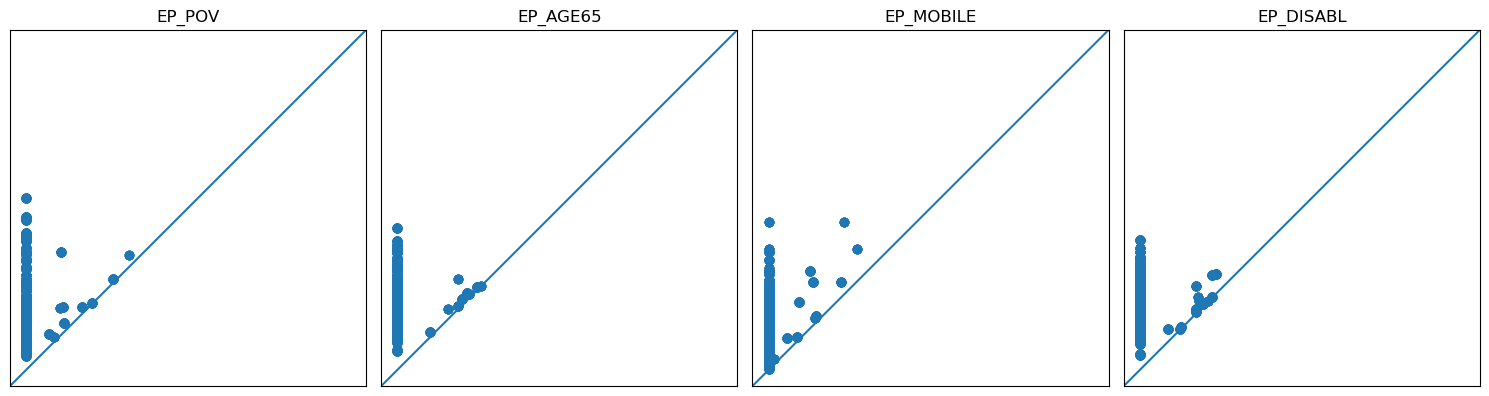

NE
Number of counties: 93


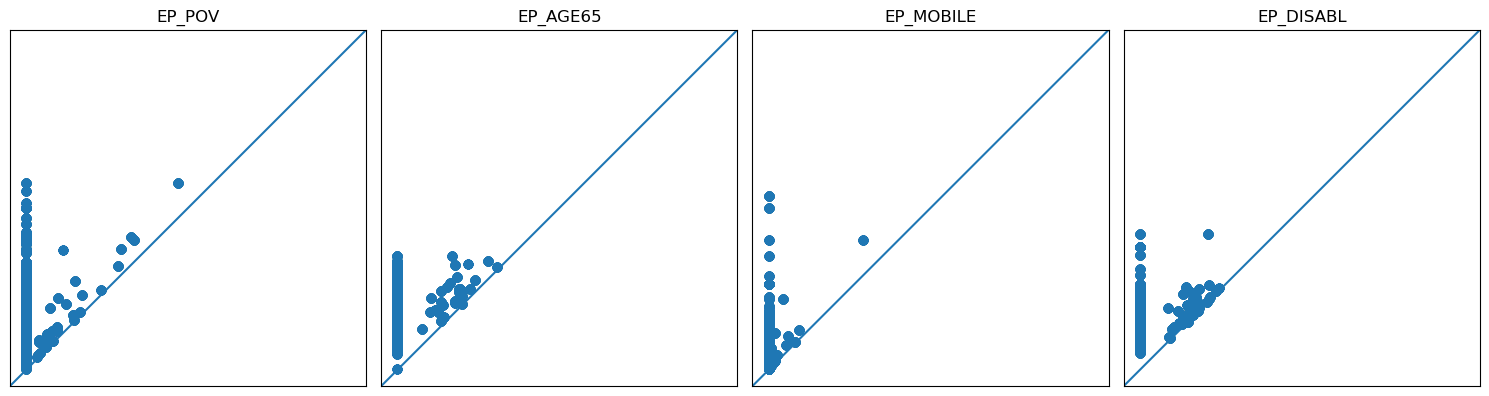

NV
Number of counties: 17


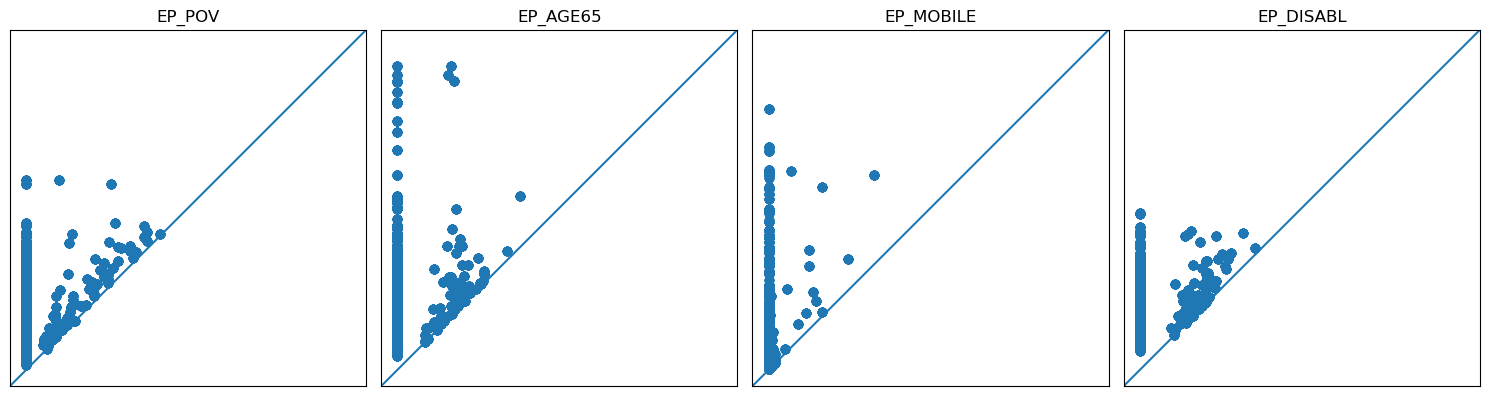

NH
Number of counties: 10


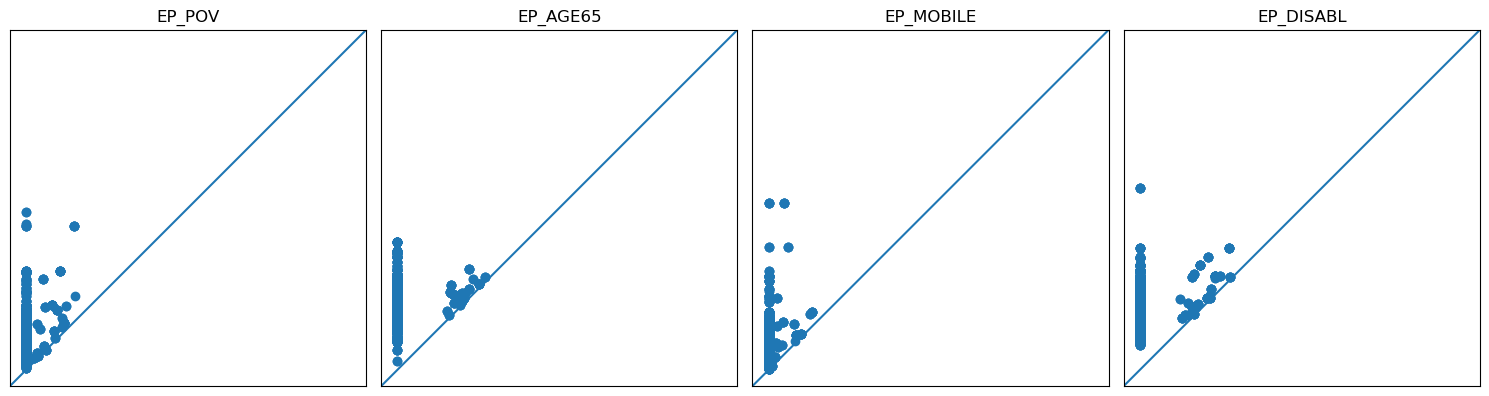

NJ
Number of counties: 21


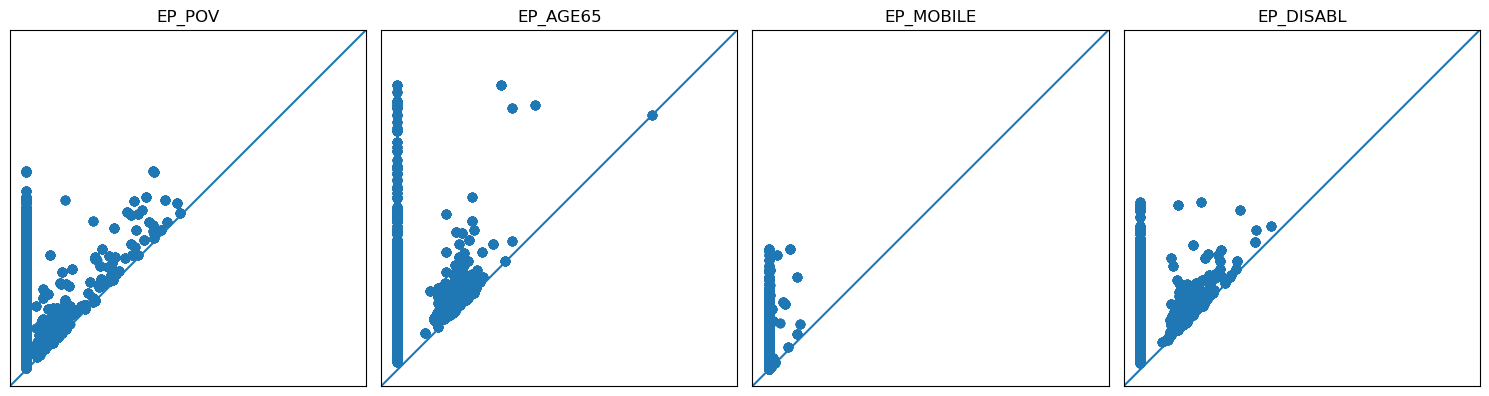

NM
Number of counties: 33
File not found for county 35039 and variable EP_POV. Skipping.
File not found for county 35039 and variable EP_AGE65. Skipping.
File not found for county 35039 and variable EP_MOBILE. Skipping.
File not found for county 35039 and variable EP_DISABL. Skipping.


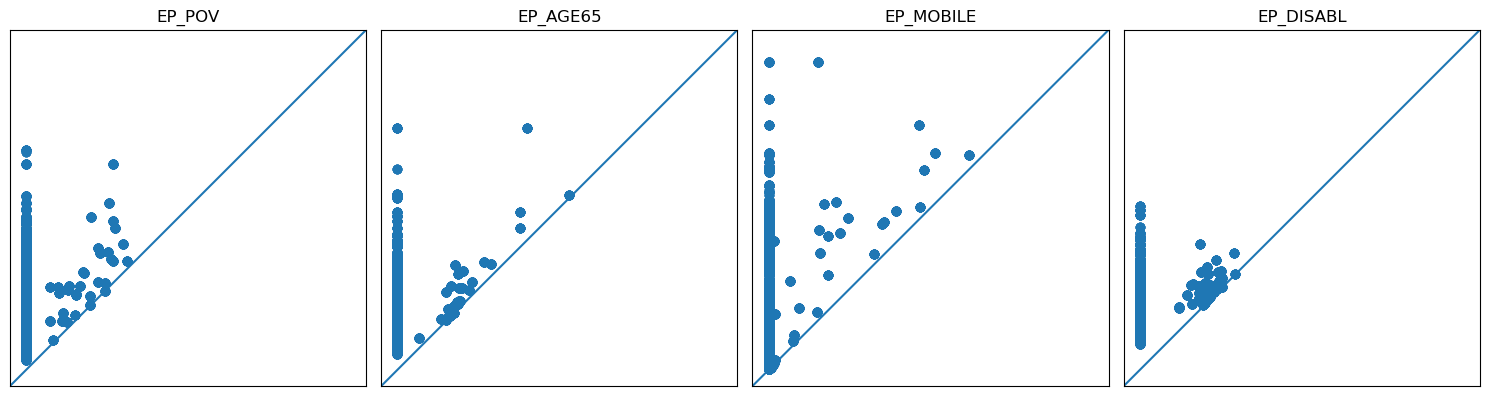

NY
Number of counties: 62


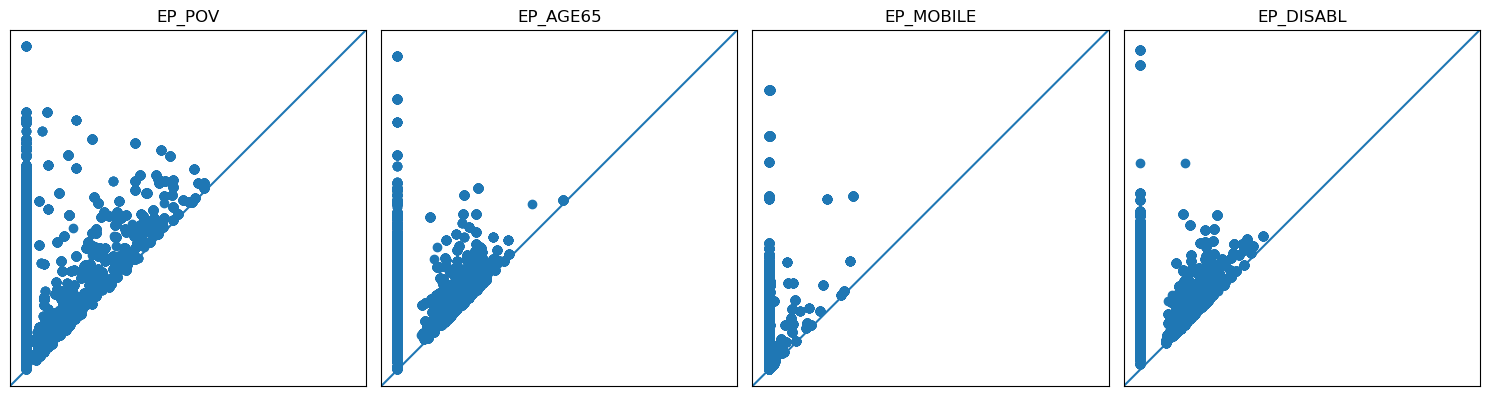

NC
Number of counties: 100


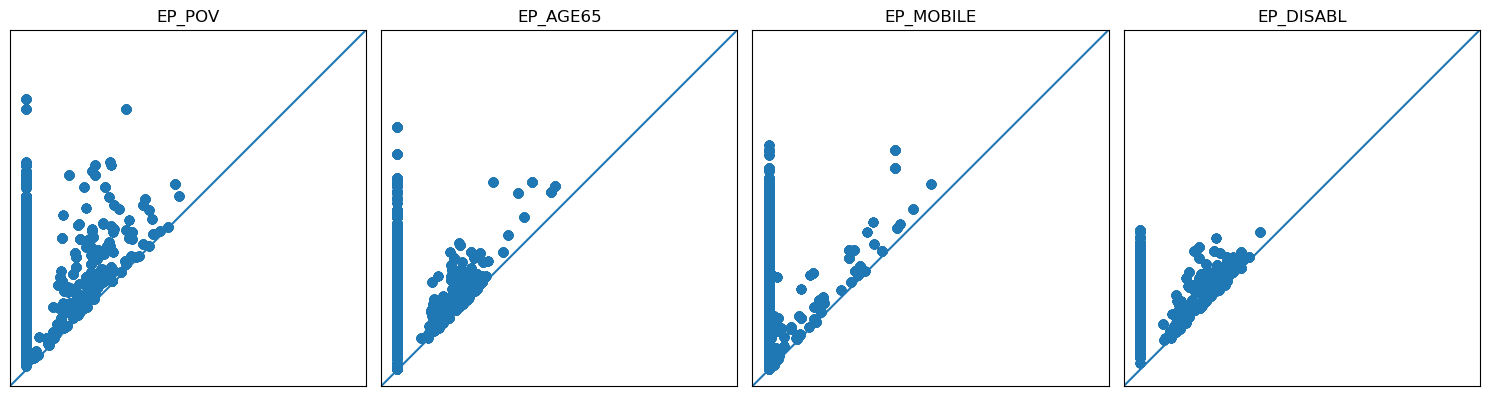

OH
Number of counties: 88


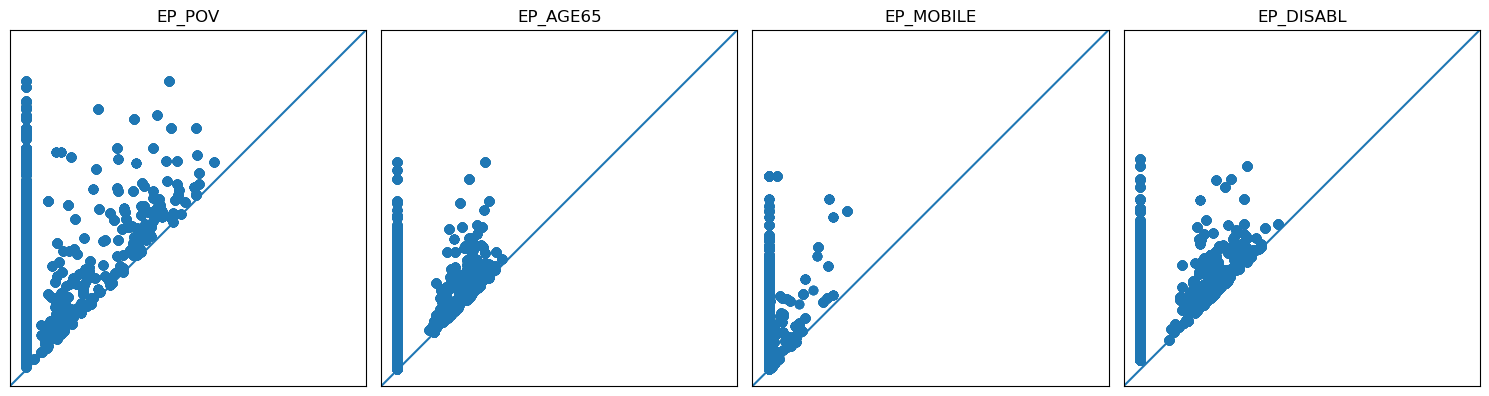

OR
Number of counties: 36


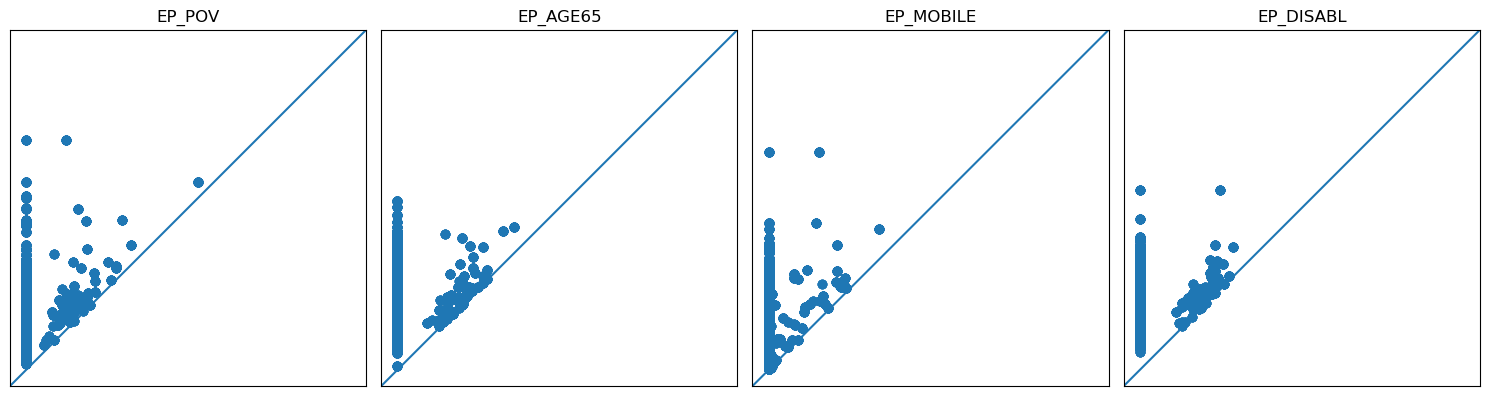

PA
Number of counties: 67


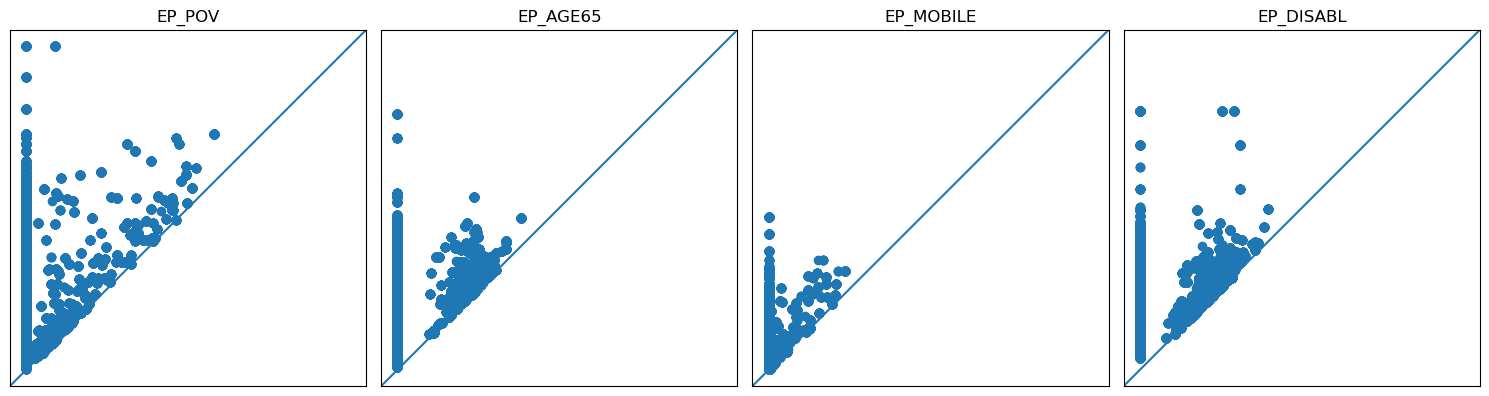

RI
Number of counties: 5


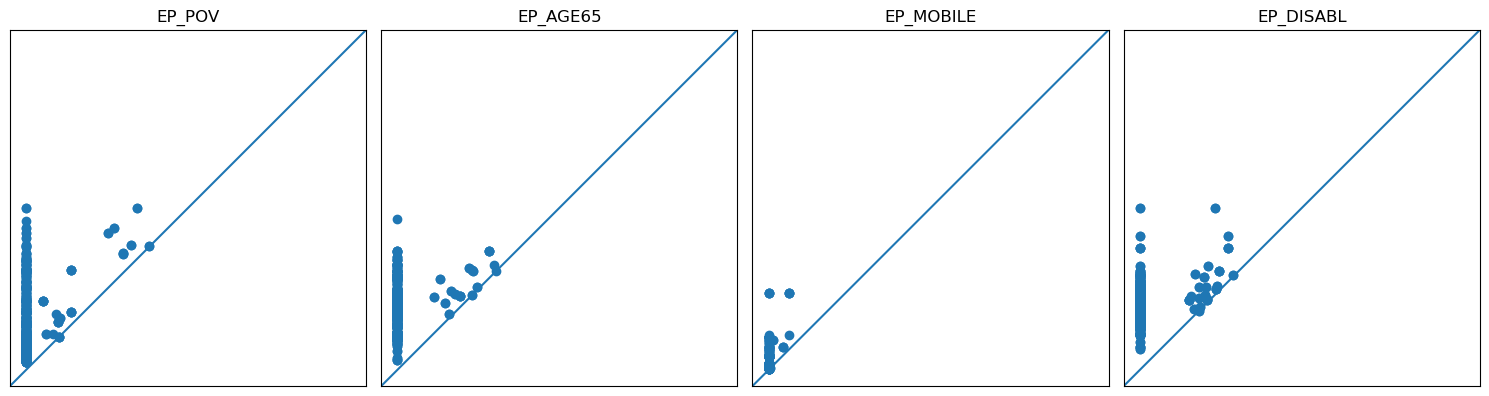

SC
Number of counties: 46


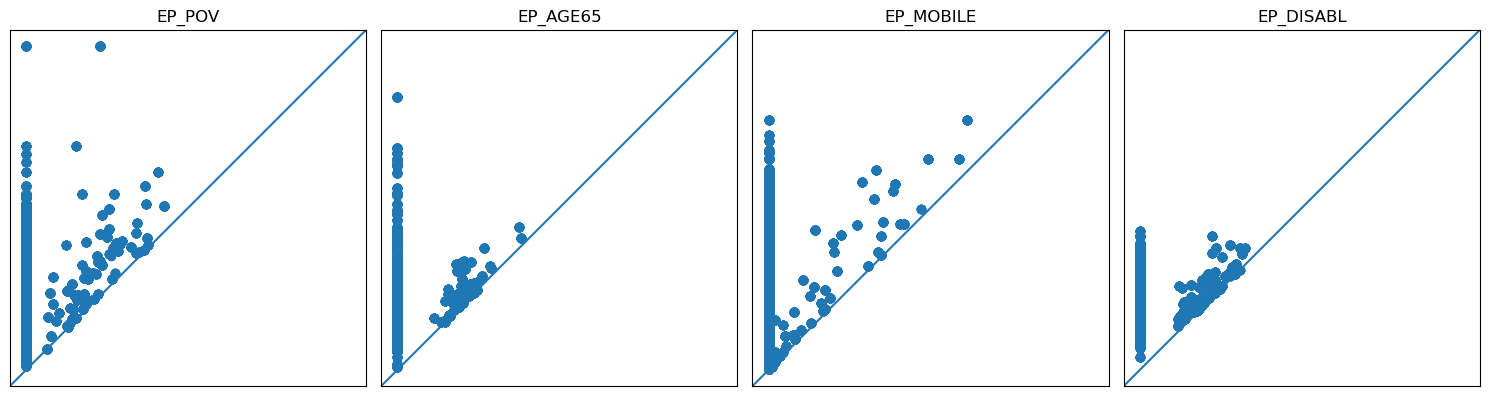

TN
Number of counties: 95


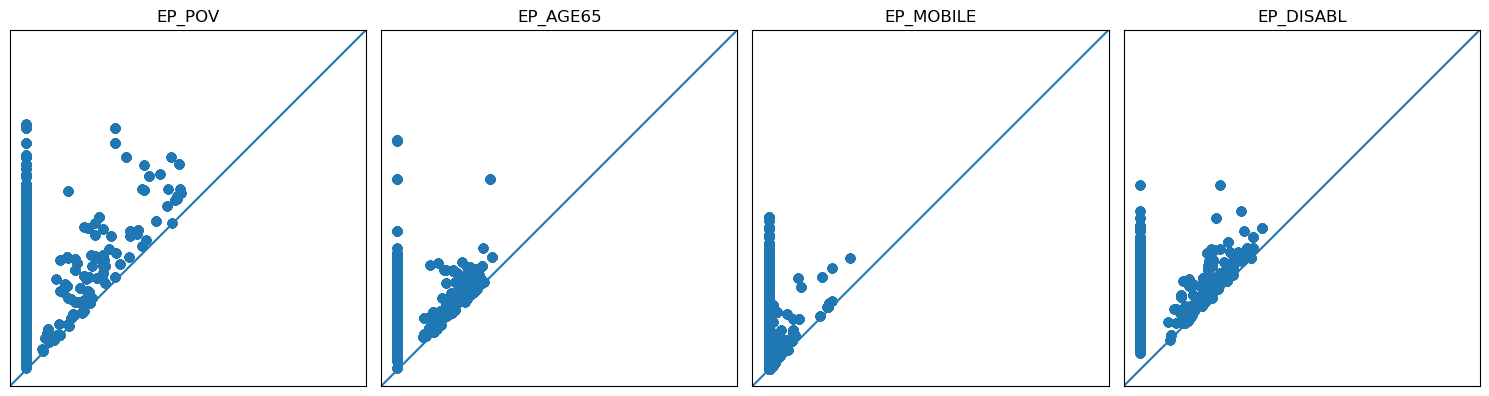

TX
Number of counties: 254


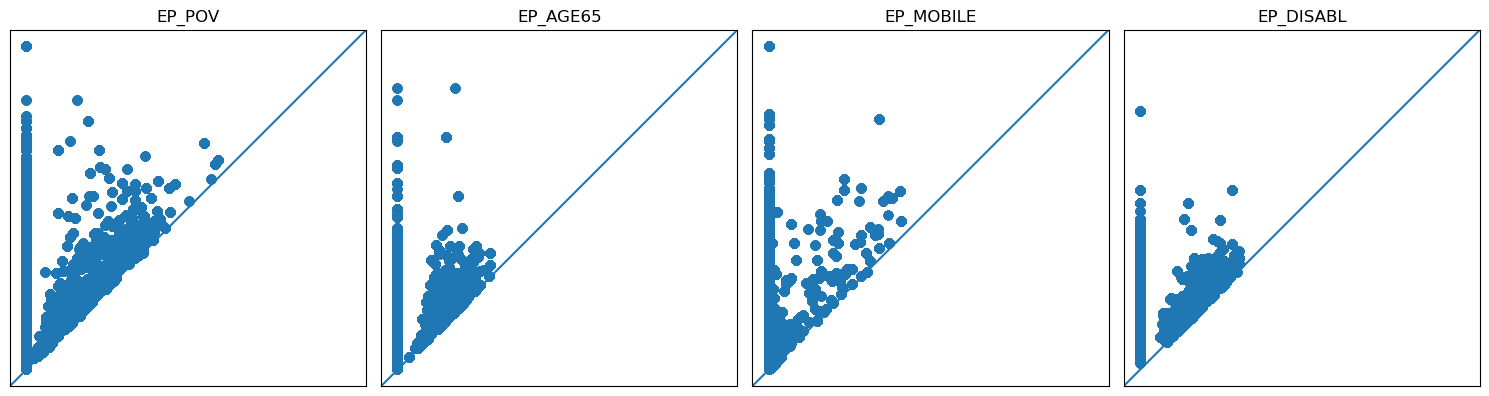

UT
Number of counties: 29


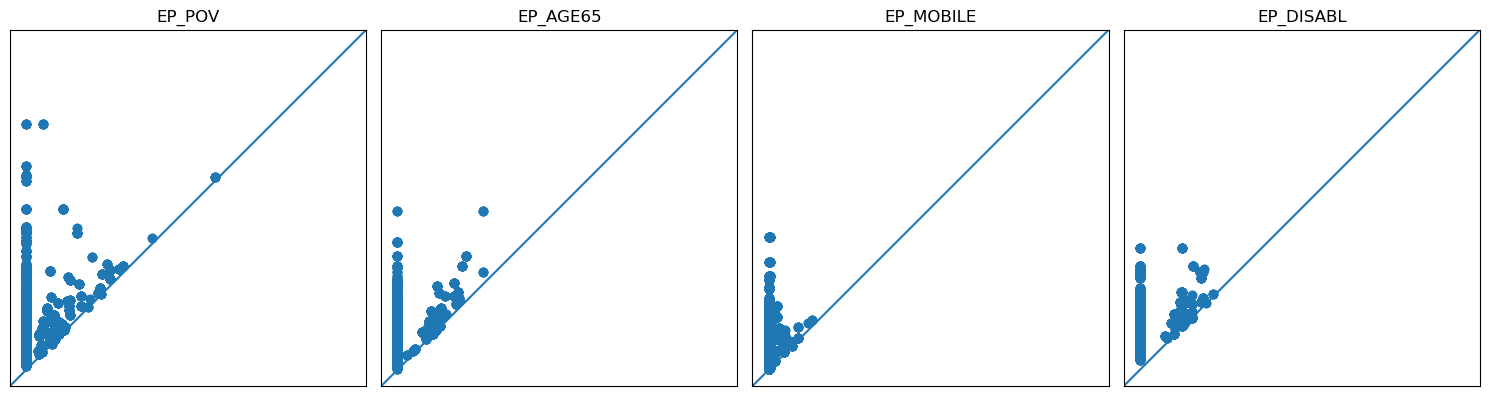

VT
Number of counties: 14


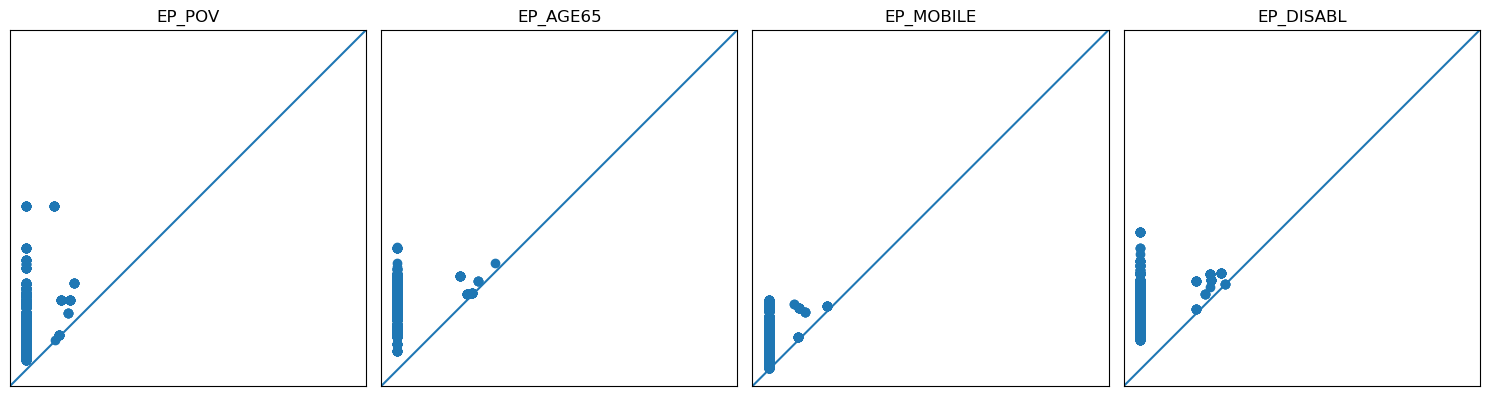

VA
Number of counties: 133


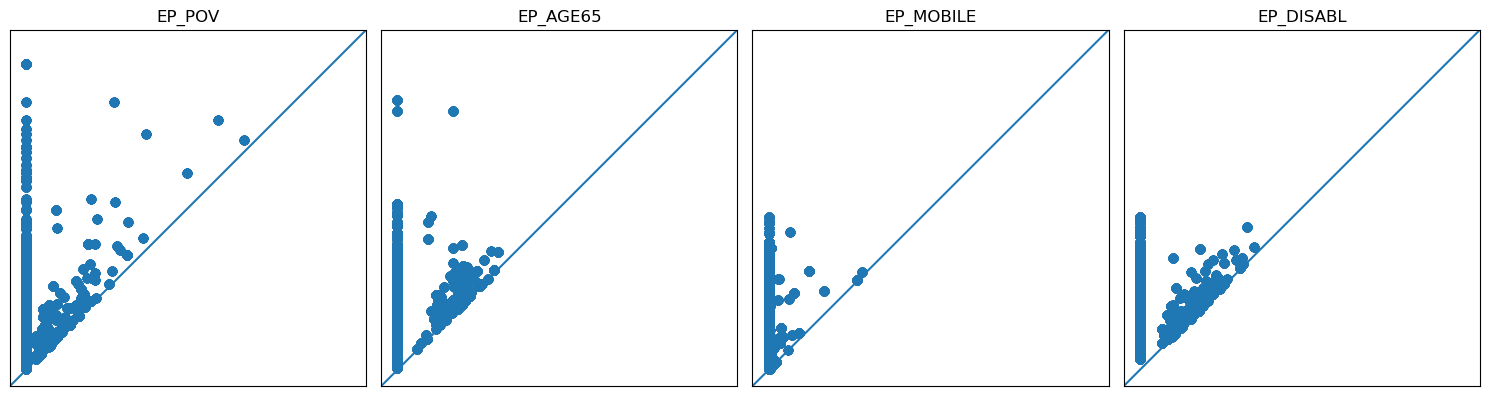

WA
Number of counties: 39


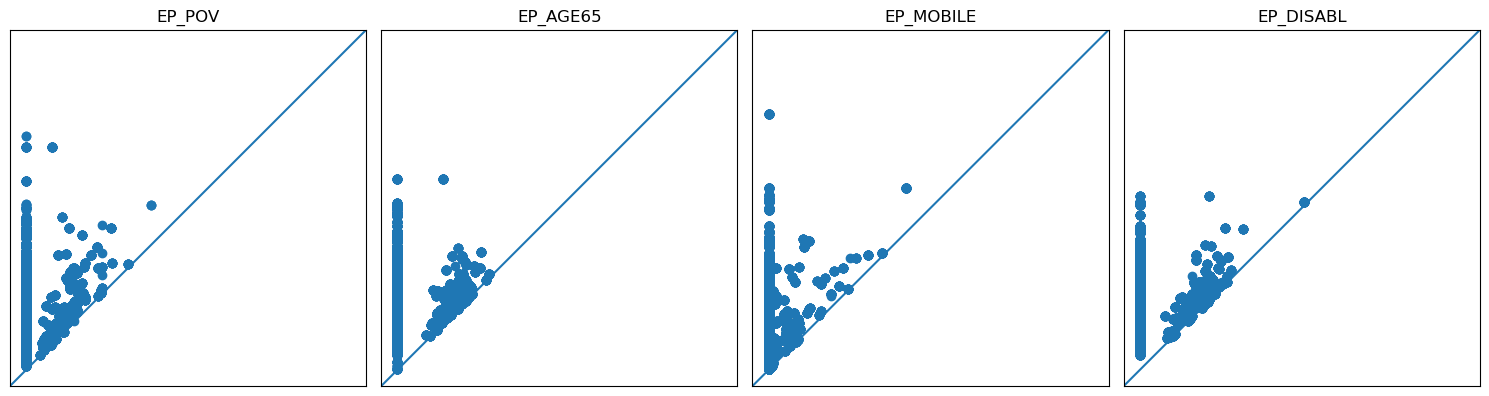

WI
Number of counties: 72


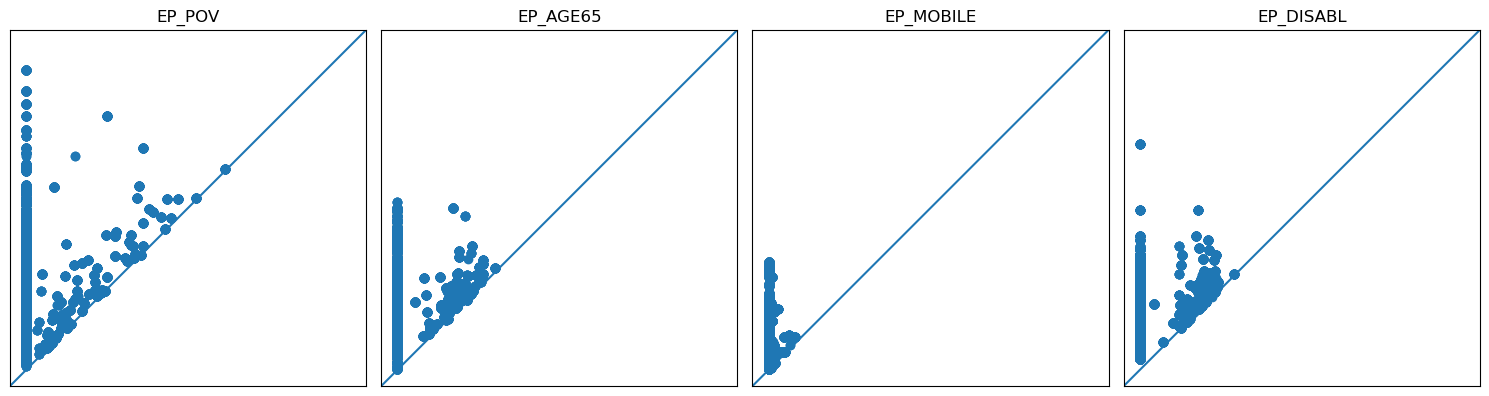

WY
Number of counties: 23


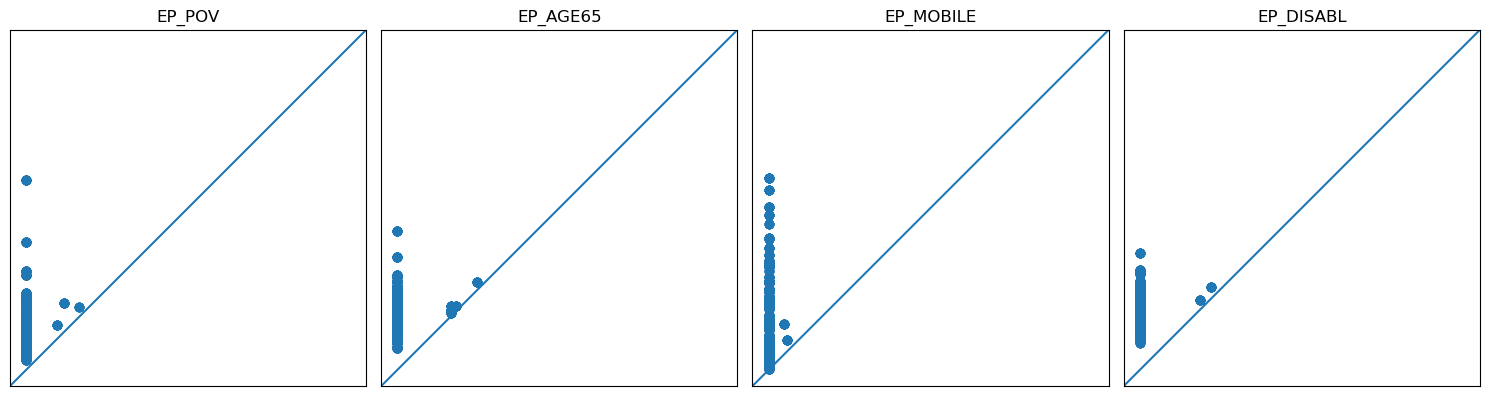

ID
Number of counties: 44


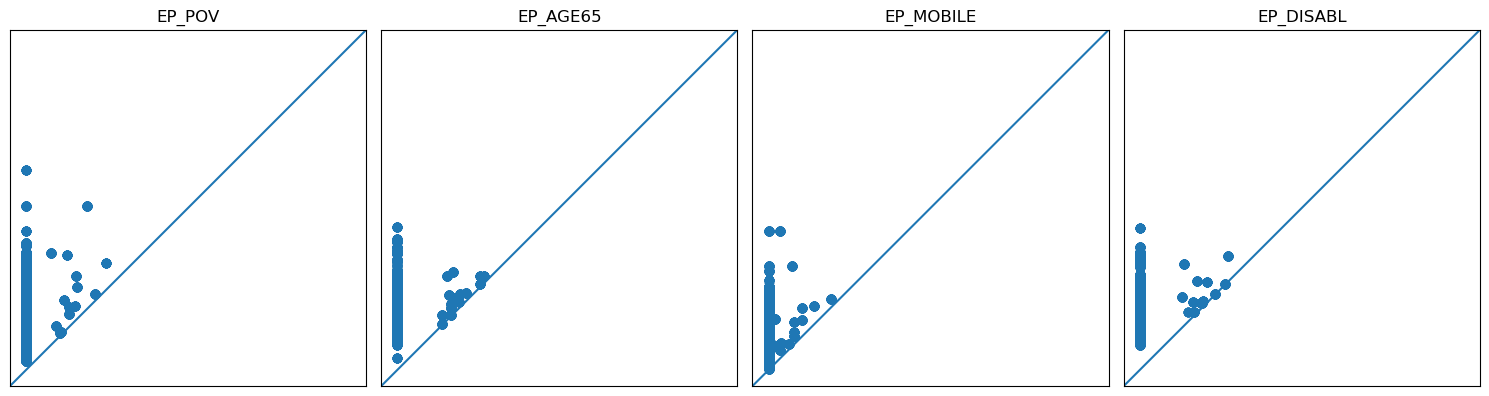

ND
Number of counties: 53


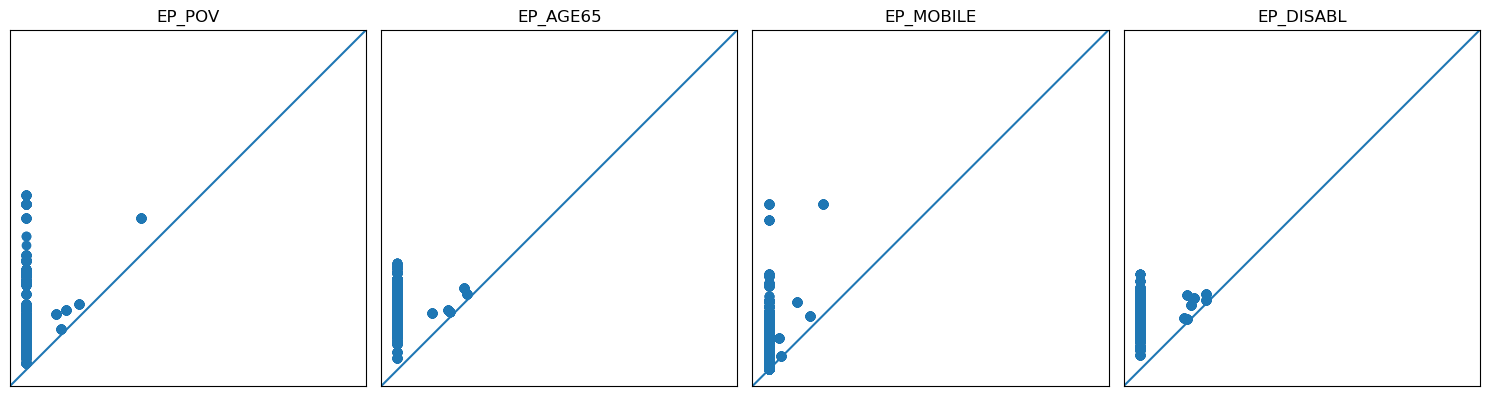

OK
Number of counties: 77


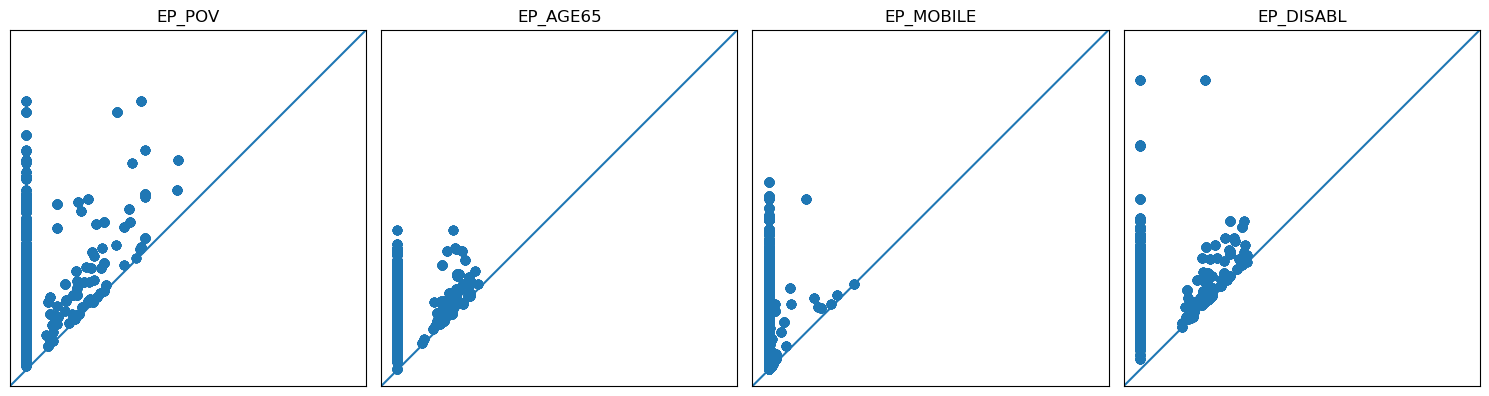

SD
Number of counties: 66


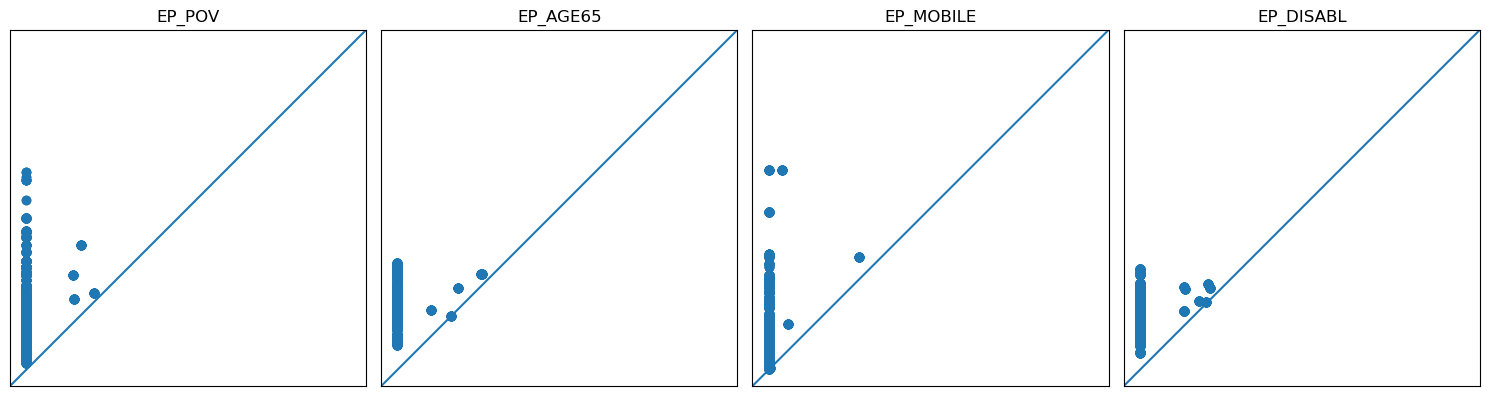

WV
Number of counties: 55


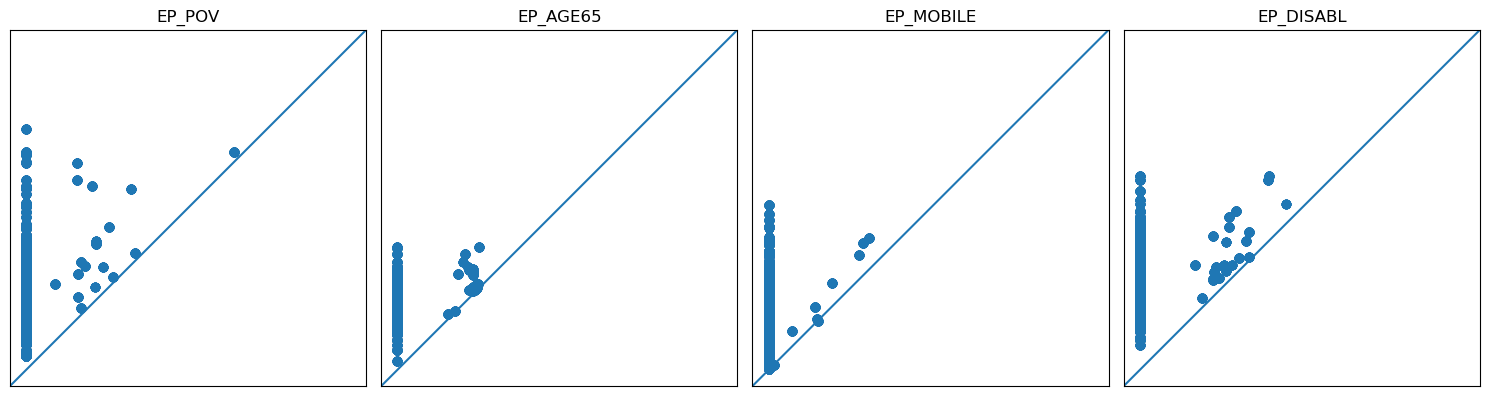

In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt
from persim import PersistenceImager  # Assuming you're using persim for PersistenceImager

# Matplotlib default settings
mpl.rcParams.update(mpl.rcParamsDefault)

path = "/home/h6x/git_projects/ornl-svi-data-processing/processed_data/adjacency_pers_images_npy_county/persistence_data"
variables = ["EP_POV", "EP_AGE65", "EP_MOBILE",'EP_DISABL']  # Add more variables as needed

# variables = [
    #      'EP_POV','EP_UNEMP', 'EP_NOHSDP', 'EP_UNINSUR', 'EP_AGE65', 'EP_AGE17', 'EP_DISABL', 
    #     'EP_SNGPNT', 'EP_LIMENG', 'EP_MINRTY', 'EP_MUNIT', 'EP_MOBILE', 'EP_CROWD', 'EP_NOVEH', 'EP_GROUPQ'
    # ]

# Assuming 'states' and 'us_svi' are defined earlier
for state in states:
    print(state)

    state_svi = us_svi[us_svi['ST_ABBR'] == state]

    # Get the unique counties
    counties = state_svi['STCNTY'].unique().tolist()
    print(f"Number of counties: {len(counties)}")

    # Create a figure with subplots for each variable, arranged horizontally
    fig, axes = plt.subplots(1, len(variables), figsize=(15, 5))  # 1 row, len(variables) columns

    for var_idx, var in enumerate(variables):
        combined_data_state = []

        for county in counties:
            try:
                # Try loading the dictionary from the .npy file
                dictionary = np.load(os.path.join(path, f'{county}_{var}.npy'), allow_pickle=True)

                # If data is a 0-d array, extract the object using .item()
                if dictionary.shape == ():  # This means it's a 0-d array
                    dictionary = dictionary.item()  # Extract the dictionary or object

                # Iterate over the dictionary
                for key in dictionary:
                    for value in dictionary[key]:
                        combined_data_state.append(value)

            except FileNotFoundError:
                print(f"File not found for county {county} and variable {var}. Skipping.")
            except Exception as e:
                print(f"Error loading data for county {county} and variable {var}: {str(e)}")
        
        # Plot for the current variable if data is available
        if combined_data_state:
            # print(f"Total combined data points for {state} and variable {var}: {len(combined_data_state)}")

            pimgr = PersistenceImager(pixel_size=0.01)

            # Plotting the persistence diagram for the current variable
            ax = axes[var_idx]  # Select the correct subplot for the current variable

            # Remove tick labels
            ax.set_xticks([])
            ax.set_yticks([])

            # Plot the persistence diagram on the corresponding axis
            pimgr.plot_diagram(combined_data_state, skew=False, ax=ax)

            # Set the title for the subplot
            ax.set_title(var)

            # Remove axis labels
            ax.set_xlabel('')
            ax.set_ylabel('')

        else:
            print(f"No data available for {state} and variable {var} to plot.")

    # Adjust layout to ensure no overlap between plots
    plt.tight_layout()

    # Show the combined plot for the current state
    plt.show()

    # Optionally, remove the break to process all states
    # break
